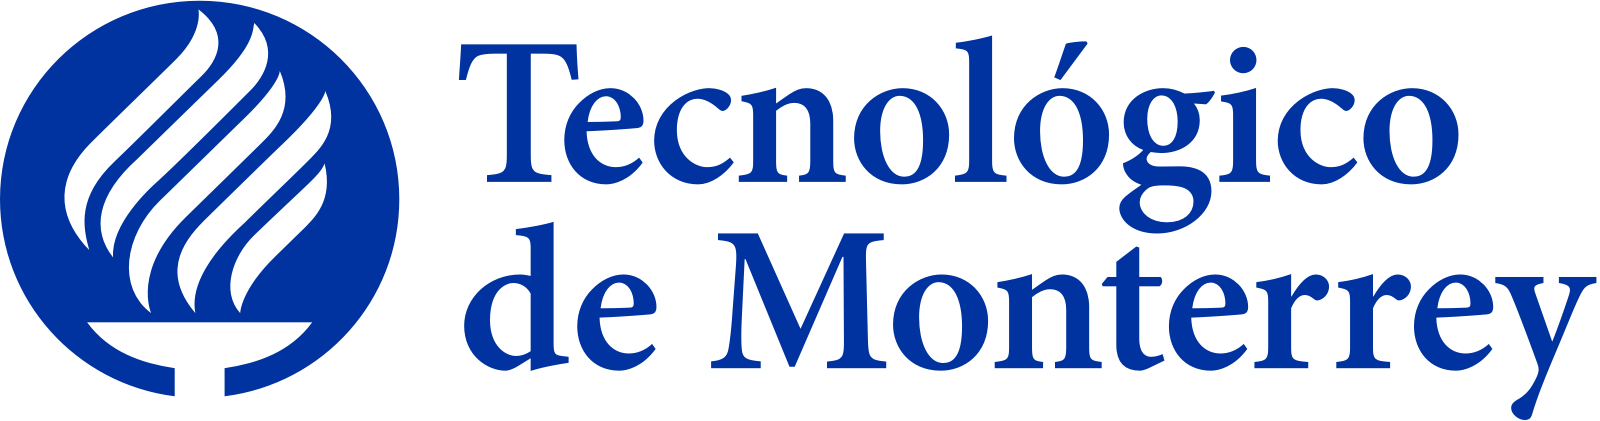

#**Maestría en Inteligencia Artificial Aplicada**

**Asignatura:** Inteligencia artificial y aprendizaje automático

**Profesor Titular:** Luis Eduardo Falcón Morales

**Tema:** Árboles de decisión y bosque aleatorio.

**Semana:** Semana Seis

**Estudiantes:**

* Henry Aranzales Lopez
* Gustavo Guerrero Villa
* Carlos Larrahondo Valencia
* Elmer Payró Costilla

**Marticulas:** 
* A01794020
* A01207677
* A01794031
* A01014943

**Grupo:** Grupo 22 - Profesor Omar Paredes


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt 
import seaborn as sns 

# Para hacer las particiones
from sklearn.model_selection import train_test_split, GridSearchCV

# Objetos de orquestación
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Objectos de limpieza y preprocesamiento de datos
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, FunctionTransformer

# Modelos a utilizar
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Elementos para las métricas
from sklearn.metrics import confusion_matrix         
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold

# Curvas de aprendizaje y validación
from sklearn.model_selection import learning_curve, validation_curve

# Graficas de árbol de decisión
from sklearn import tree
import pydotplus 
from IPython.display import Image

import os

#**Ejercicio-1.** 

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.

In [2]:
#Carga y lectura de base de datos

df= pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/IAyAA_Equipo_64/main/Actividad_Semana_6/Dataset/SouthGermanCredit.asc', sep='\s+', lineterminator='\n')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit\r
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
#Sustitución de nombres de las columnas

df.rename(columns = {
    'laufkont':'Estado',
    'laufzeit':'Duracion_Credito',
    'moral':'Historial_Crediticio',
    'verw':'Proposito_Credito',
    'hoehe':'Cantidad_Prestamo',
    'sparkont':'Ahorros',
    'beszeit':'Tiempo_Empleo',
    'rate':'Tarifa_Cuota',
    'famges':'Sexo_/EstadoCivil',
    'buerge':'Otros_Deudores',
    'wohnzeit':'Tiempo_Residencia_Actual',
    'verm':'Propiedades',
    'alter':'Edad',
    'weitkred':'Planes_de_Pago',
    'wohn':'Tipo_de_Vivienda',
    'bishkred':'Numero_de_Creditos',
    'beruf':'Trabajo',
    'pers':'Personas_a_Cargo',
    'telef':'Telefono',
    'gastarb':'Trabajador_Extranjero',
    'kredit\r':'Riesgo_Creditico' #Es la variable que indica la posibilidad de otorgar el credito
}, inplace = True)
df.head()


,Estado,Duracion_Credito,Historial_Crediticio,Proposito_Credito,Cantidad_Prestamo,Ahorros,Tiempo_Empleo,Tarifa_Cuota,Sexo_/EstadoCivil,Otros_Deudores,...,Propiedades,Edad,Planes_de_Pago,Tipo_de_Vivienda,Numero_de_Creditos,Trabajo,Personas_a_Cargo,Telefono,Trabajador_Extranjero,Riesgo_Creditico
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [4]:
df.columns

Index(['Estado', 'Duracion_Credito', 'Historial_Crediticio',
       'Proposito_Credito', 'Cantidad_Prestamo', 'Ahorros', 'Tiempo_Empleo',
       'Tarifa_Cuota', 'Sexo_/EstadoCivil', 'Otros_Deudores',
       'Tiempo_Residencia_Actual', 'Propiedades', 'Edad', 'Planes_de_Pago',
       'Tipo_de_Vivienda', 'Numero_de_Creditos', 'Trabajo', 'Personas_a_Cargo',
       'Telefono', 'Trabajador_Extranjero', 'Riesgo_Creditico'],
      dtype='object')

#**Ejercicio-2.**

Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las
variables de entrada y a la variable Y como la variable de salida.

In [5]:
# Partición de los conjuntos de datos entrenamiento y prueba

# Valores en X
X = df.iloc[:,0:20]
# Valores en Y valor objetivo
Y = df.iloc[:, -1]

# Datos de validación, función trains_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=0.85, random_state=10)
                                                  
print(X_train.shape, ': Conjunto de entrada para entrenamiento')
print(X_val.shape, ': Conjunto de entrada para prueba')  

print(Y_train.shape, ': Conjunto de salida para prueba')
print(Y_val.shape, ': Conjunto de salida para prueba')

(850, 20) : Conjunto de entrada para entrenamiento
(150, 20) : Conjunto de entrada para prueba
(850,) : Conjunto de salida para prueba
(150,) : Conjunto de salida para prueba


In [6]:
# Valores X

X_train.head()

,Estado,Duracion_Credito,Historial_Crediticio,Proposito_Credito,Cantidad_Prestamo,Ahorros,Tiempo_Empleo,Tarifa_Cuota,Sexo_/EstadoCivil,Otros_Deudores,Tiempo_Residencia_Actual,Propiedades,Edad,Planes_de_Pago,Tipo_de_Vivienda,Numero_de_Creditos,Trabajo,Personas_a_Cargo,Telefono,Trabajador_Extranjero
548,2,12,2,0,1007,4,3,4,4,1,1,1,22,3,2,1,3,2,1,2
335,1,24,2,2,1747,1,2,4,3,2,1,2,24,3,2,1,2,2,1,1
793,1,12,2,6,795,1,2,4,2,1,4,2,53,3,2,1,3,2,1,2
848,2,36,2,3,2671,2,3,4,2,2,4,4,50,3,3,1,3,2,1,2
295,4,36,2,1,8133,1,3,1,2,1,2,2,30,1,2,1,3,2,1,2


In [7]:
# Valores Y
Y_train.head()

548    1
335    1
793    0
848    0
295    1
Name: Riesgo_Creditico, dtype: int64

#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de
cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha información realiza un Pipeline que incluya al menos las siguientes transformaciones:

>a. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso).

>b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.

>c. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar

In [8]:
#Para definir con precisión las variables, es importante conocer los valores unicos de cada una: 

print(',\n'.join([f'{col}: ' + ', '.join([str(i) 
                  for i in sorted(df[col].unique())]) 
                  for col in df.columns 
                  if col not in ['age', 'amount', 'duration']]))

Estado: 1, 2, 3, 4,
Duracion_Credito: 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24, 26, 27, 28, 30, 33, 36, 39, 40, 42, 45, 47, 48, 54, 60, 72,
Historial_Crediticio: 0, 1, 2, 3, 4,
Proposito_Credito: 0, 1, 2, 3, 4, 5, 6, 8, 9, 10,
Cantidad_Prestamo: 250, 276, 338, 339, 343, 362, 368, 385, 392, 409, 426, 428, 433, 448, 454, 458, 484, 518, 522, 571, 585, 590, 601, 609, 618, 625, 626, 629, 639, 640, 652, 654, 660, 662, 666, 672, 674, 682, 683, 684, 685, 691, 697, 700, 701, 707, 708, 709, 713, 717, 719, 727, 730, 741, 745, 750, 753, 754, 759, 760, 763, 766, 776, 781, 783, 790, 795, 797, 802, 804, 806, 836, 841, 846, 860, 866, 874, 882, 884, 886, 888, 894, 900, 902, 907, 909, 915, 918, 926, 929, 930, 931, 932, 935, 936, 937, 939, 947, 950, 951, 958, 959, 960, 975, 976, 983, 996, 999, 1007, 1024, 1028, 1037, 1038, 1042, 1047, 1048, 1049, 1050, 1053, 1055, 1056, 1068, 1076, 1082, 1092, 1098, 1101, 1103, 1107, 1108, 1113, 1123, 1126, 1131, 1136, 1138, 1149, 1154, 1155, 1158

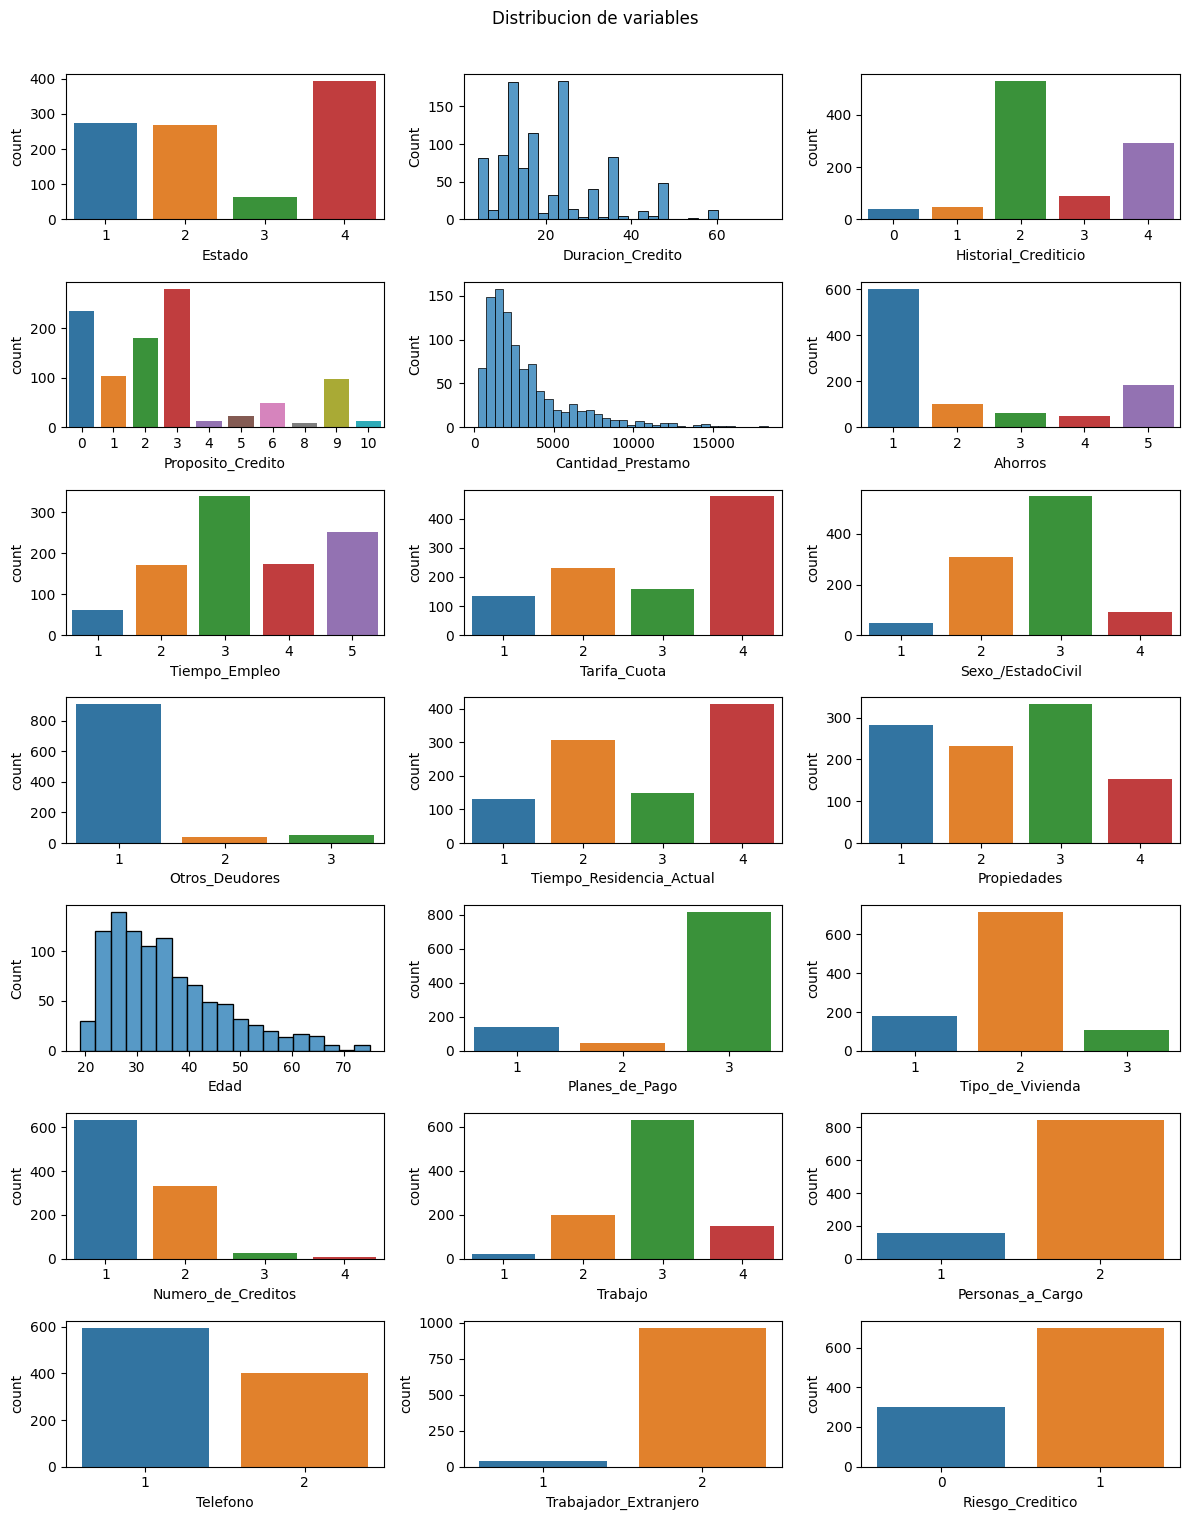

In [9]:
cont_list = ['Edad', 'Cantidad_Prestamo', 'Duracion_Credito']   
nrows_subplot = int(df.shape[1] / 3 + df.shape[1] % 3)
n_subplot = 0
fig = plt.figure(figsize=(12, 15))
for col in df.columns:
    n_subplot += 1
    plt.subplot(nrows_subplot, 3, n_subplot)
    if col not in cont_list:
        sns.countplot(x=col, data=df)
    else:
        sns.histplot(x=col, data=df)
plt.suptitle('Distribucion de variables', y=1.01)
plt.tight_layout()

Los gráficos anteriores muestran que las variables continuas son la edad, la cantidad del prestamo y la duración del mismo.

In [10]:
# Definición de las variables

categorical = ['Estado','Historial_Crediticio','Proposito_Credito','Ahorros','Sexo_/EstadoCivil','Otros_Deudores','Propiedades','Planes_de_Pago','Tipo_de_Vivienda','Trabajo']
discretized_quantitative = ['Tiempo_Empleo', 'Tarifa_Cuota','Tiempo_Residencia_Actual','Numero_de_Creditos']
numeric = ['Duracion_Credito','Cantidad_Prestamo','Edad']
binary = ['Personas_a_Cargo','Telefono','Trabajador_Extranjero']


a. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso).

>> Justificación: Se realiza una imputación de la media de cada columna que contiene valores numéricos, debido a que así se evita que se genere un sesgo en la distribución original de los datos, es decir, se mantiene el equilibrio. 

>> No se utiliza la regresión, ya que:

>> * Incrementa artificialmente las relaciones entre variables.

>> * Hace que se subestime la varianza de las distribuciones.

>> * Asume que las variables con datos ausentes tienen relación de alta magnitud con las otras variables.

>> Para el caso de las variables no numericas, se utiliza como valor la moda del conjunto de datos. 

In [11]:
# Transformaciones a variables numéricas de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = numeric

# Transformaciones a variables  categóricas de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = categorical + discretized_quantitative + binary


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres)],
                                                        remainder='passthrough')

b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.


c. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar.

>> Justificación: Para variables categóricas donde no existe una relación de orden, la codificación mediante enteros no suele ser adecuada. En estos casos, se puede aplicar una codificación especial donde se agrega una nueva variable binaria (con valores verdadero o falso) para cada valor de categoría posible.

>>La codificación One-Hot es un método para etiquetar a qué clase pertenecen los datos y la idea es asignar 0 a toda la dimensión, excepto 1 para la clase a la que pertenecen los datos.

In [12]:
# Transformaciones a variables  categóricas y binarias de entrada:
catOHE_pipeline = OneHotEncoder(handle_unknown="ignore")
catOHE_pipeline_nombres = categorical + binary

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                                        remainder='passthrough')

#**Ejercicio-4.**

Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las siguientes características

a. Usa los parámetros predeterminados de cada modelo.

In [13]:
def get_models():
  Modelos = list()
  Nombres = list()

  # LR - Regresión Logística:
  Modelos.append(LogisticRegression(solver='lbfgs', max_iter=10000, random_state=1))
  Nombres.append('Regresion Logistica')

  # DT - Árbol de Decisión:
  Modelos.append(DecisionTreeClassifier())
  Nombres.append('Arbol de decisión')

  # RF - Árbol de Decisión:
  Modelos.append(RandomForestClassifier())
  Nombres.append('Bosque Aleatorio')

  return Modelos, Nombres

b. Definición de funciones para las siguientes métricas: accuracy, precision,
recall, f1-score y Gmean.

In [14]:
def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  return precision

def mi_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp/(tp+fn)
  return recall

def mi_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  f1score = (2*tp)/((2*tp)+fp+fn)
  return f1score

def mi_gmean(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp / (tp + fn)
  especifidad = tn / (tn + fp)
  gmean = np.sqrt(recall * especifidad)
  return gmean

c. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.

In [15]:
Modelos, Nombres = get_models()  # Se cargan los modelos para la comparación
Resultados = list()   

for i in range(len(Modelos)):
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',Modelos[i])])  
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3) # Criterio de particiones y repeticiones

  Metricas = {
      "accuracy": make_scorer(mi_accuracy),
      "precision": make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)
  }

In [16]:
Modelos, Nombres = get_models()  # Se cargan los modelos para la comparación
Resultados = list()   

for i in range(len(Modelos)):
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',Modelos[i])])  
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3) # Criterio de particiones y repeticiones

  Metricas = {
      "accuracy": make_scorer(mi_accuracy),
      "precision": make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)
  }

  ResultadosI= cross_validate(pipeline, X_train, Y_train, scoring=Metricas, cv=kfold, return_train_score=True)
  Resultados.append(ResultadosI)

# Impresión de las metricas 

  print(str(Nombres[i].upper())+'\n')

  print("Testeo: \n")
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (Nombres[i],
                                                                          np.mean(ResultadosI['test_accuracy']),
                                                                          np.std(ResultadosI['test_accuracy']), 
                                                                          np.mean(ResultadosI['test_precision']),
                                                                          np.std(ResultadosI['test_precision']), 
                                                                          np.mean(ResultadosI['test_recall']),
                                                                          np.std(ResultadosI['test_recall']),
                                                                          np.mean(ResultadosI['test_f1score']),
                                                                          np.std(ResultadosI['test_f1score']),
                                                                          np.mean(ResultadosI['test_gmean']),
                                                                          np.std(ResultadosI['test_gmean'])
                                                                          ))
  print("Entrenamiento: \n")
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (Nombres[i],
                                                                          np.mean(ResultadosI['train_accuracy']),
                                                                          np.std(ResultadosI['train_accuracy']), 
                                                                          np.mean(ResultadosI['train_precision']),
                                                                          np.std(ResultadosI['train_precision']), 
                                                                          np.mean(ResultadosI['train_recall']),
                                                                          np.std(ResultadosI['train_recall']),
                                                                          np.mean(ResultadosI['train_f1score']),
                                                                          np.std(ResultadosI['train_f1score']),
                                                                          np.mean(ResultadosI['train_gmean']),
                                                                          np.std(ResultadosI['train_gmean'])
                                                                          ))

REGRESION LOGISTICA

Testeo: 

Regresion Logistica:
mean Accuracy: 0.755 (0.0320)
mean Precision: 0.797 (0.0208)
mean Recall: 0.878 (0.0301)
mean F1score: 0.835 (0.0223)
Gmean: 0.631 (0.0473)

Entrenamiento: 

Regresion Logistica:
mean Accuracy: 0.793 (0.0111)
mean Precision: 0.822 (0.0091)
mean Recall: 0.904 (0.0081)
mean F1score: 0.861 (0.0073)
Gmean: 0.688 (0.0194)

ARBOL DE DECISIÓN

Testeo: 

Arbol de decisión:
mean Accuracy: 0.688 (0.0220)
mean Precision: 0.783 (0.0124)
mean Recall: 0.774 (0.0371)
mean F1score: 0.778 (0.0195)
Gmean: 0.608 (0.0279)

Entrenamiento: 

Arbol de decisión:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

BOSQUE ALEATORIO

Testeo: 

Bosque Aleatorio:
mean Accuracy: 0.757 (0.0200)
mean Precision: 0.786 (0.0110)
mean Recall: 0.904 (0.0287)
mean F1score: 0.841 (0.0145)
Gmean: 0.601 (0.0276)

Entrenamiento: 

Bosque Aleatorio:
mean Accuracy: 1.000 (0.0000)
mean Preci

d. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu
respuesta.

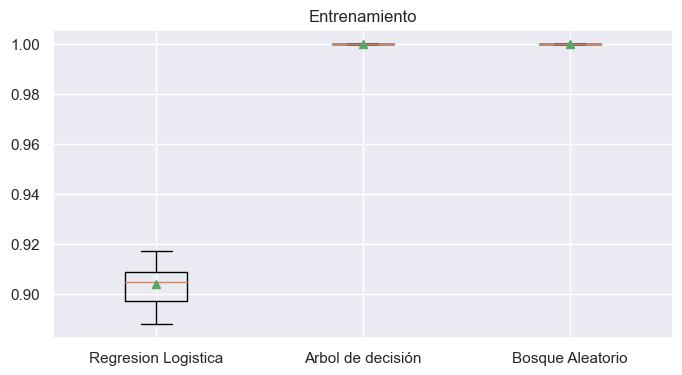

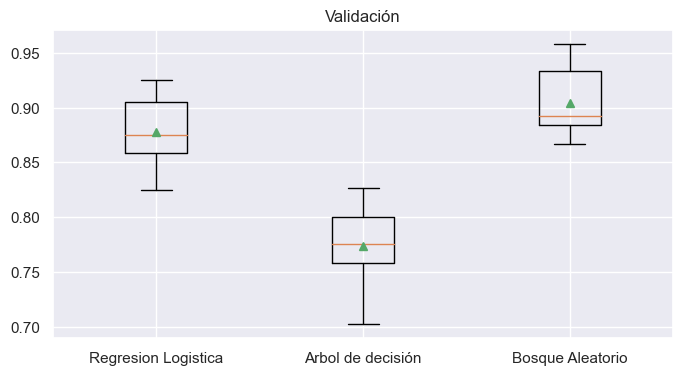

In [17]:
# Diagrama de caja y bigotes

sns.set(rc={'figure.figsize':(8,4)})

# Diagrama del conjunto de Entrenamiento
recall_r = list()
for i in range(len(Resultados)):
  rr = Resultados[i]['train_recall']
  recall_r.append(rr)
plt.boxplot(recall_r, labels = Nombres, showmeans = True)
plt.title('Entrenamiento')
plt.show()

# Diagrama del conjunto de Validación
recall_r = list()
for i in range(len(Resultados)):
  rr = Resultados[i]['test_recall']
  recall_r.append(rr)
plt.boxplot(recall_r, labels = Nombres, showmeans = True)
plt.title('Validación')
plt.show()

¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta.

El modelo de Árbol de decisión parece estar sobreentrenado, al tener una varianza significativa con sus resultados en entrenamiento, igual que el Bosque Aleatorio pero en menor intensidad.

e. En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado:

In [18]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    

    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

def plotValidationCurve(param_range, train_scores, val_scores):
   train_mean = np.mean(train_scores, axis=1)
   train_std = np.std(train_scores, axis=1)

   test_mean = np.mean(val_scores, axis=1)
   test_std = np.std(val_scores, axis=1)

   plt.subplots(1, figsize=(7,7))
   plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training')
   plt.plot(param_range, test_mean,color='red', marker='+', markersize=5, linestyle='--', label='Validation')

   plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
   plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")
 
   plt.title("Curvas de Aprendizaje incrementando el tamaño de la muestra")
   plt.xlabel("Tamaño del conjunto de entrenamiento")
   plt.ylabel("Exactitud (accuracy)")
   plt.tight_layout()
   plt.legend(loc="lower left")
   plt.show()


    

REGRESIÓN LOGISTICA

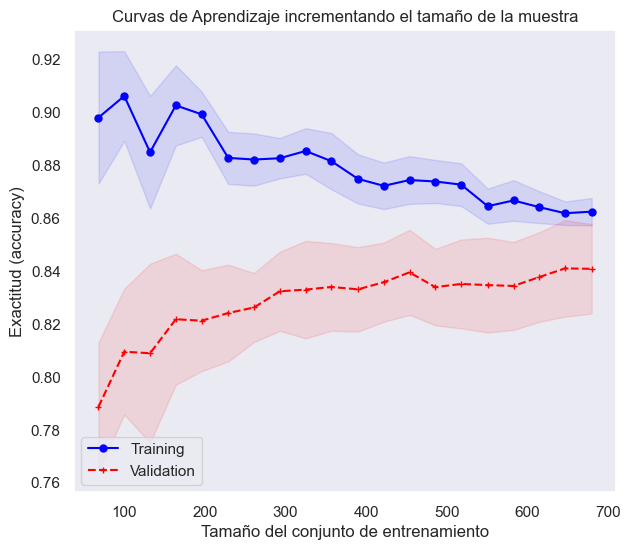

In [19]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',Modelos[0])])
delta_train_sz = np.linspace(0.1, 1.0, 20)
tr_sizes, tr_scores, val_scores = learning_curve(
  estimator = pipeline ,    
  X = X_train,
  y = Y_train,
  cv = kfold ,
  scoring=make_scorer(mi_f1score),
  train_sizes = delta_train_sz,
  random_state=11
)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

ÁRBOL DE DECISIÓN

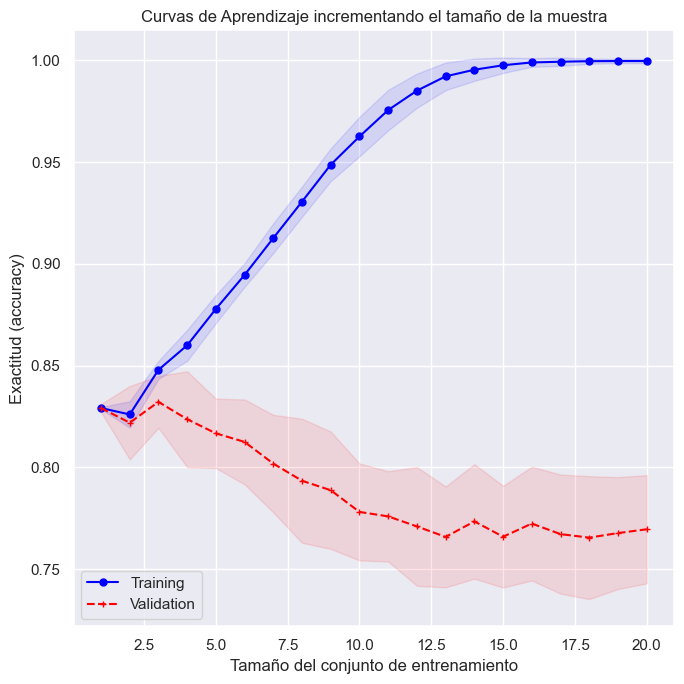

In [20]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',Modelos[1])])
delta_train_sz = np.linspace(0.1, 1.0, 20)
param_range = np.linspace(1,20,20, dtype="int")
t_scores, v_scores = validation_curve(
    estimator= pipeline,
    X = X_train,
    y = Y_train,
    param_name = "m__max_depth",
    param_range = param_range,
    cv = kfold,
    scoring = make_scorer(mi_f1score),
)
plotValidationCurve(param_range, t_scores, v_scores)

BOSQUE ALEATORIO

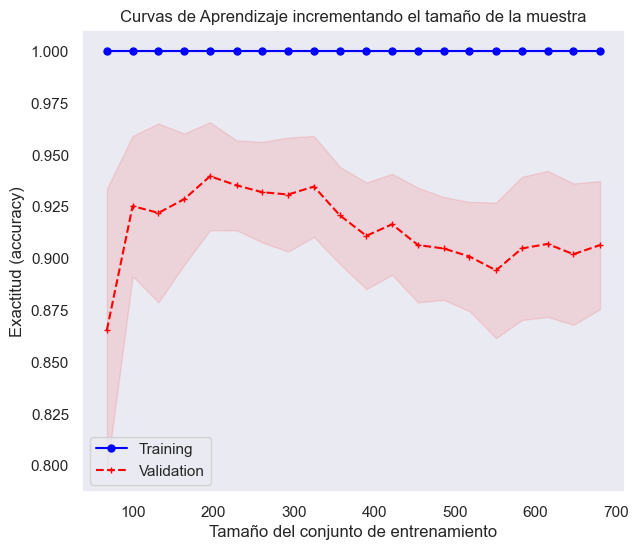

In [21]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',Modelos[2])])
delta_train_sz = np.linspace(0.1, 1.0, 20)
tr_sizes, tr_scores, val_scores = learning_curve(
    estimator= pipeline,
    X = X_train,
    y = Y_train,
    cv = kfold,
    scoring = 'recall',
    train_sizes = delta_train_sz,
    random_state=11   
)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

#**Ejercicio-5.**

In [22]:
import warnings
warnings.filterwarnings('ignore')

a. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1.


In [23]:
# Estimador para GridSearchCV Regresion Logistica
EstimadorRL = LogisticRegression()

# Parametros para GridSearchCV
# Los hiperparámetros que se deben incluir en la búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty
param_grid = { 
    'C': np.logspace(-3,3,7),    
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'class_weight': ['balanced','balanced_subsample'],
    'penalty' : ['l1','l2']
}

# Aplicando GridSearchCV a RL
GS_RegL = GridSearchCV(EstimadorRL, scoring='f1', param_grid=param_grid, cv= 5, n_jobs=-1)

5a. El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones. La puntuación F1 es el promedio ponderado de Precisión y Recuperación. Por lo tanto, esta puntuación tiene en cuenta tanto los falsos positivos como los falsos negativos.

De este modo podemos concluir que: Valores F1-Score cercanos a 1, nos permiten afirmar que el modelo cumple con nuestro propósito. Mientras que, en el caso que nos ocupa, tendríamos que determinar que, con un F1-Score de 0,217 el modelo resultante no es aceptable.


In [24]:
# Aplicamos nuestra transformación al conjunto de prueba
Xx = columnasTransformer.fit_transform(X_train)
# Medimos el modelo con GridSearchCV
GS_RegL.fit(Xx,Y_train)

print("Tuned Hyperparameters :", GS_RegL.best_params_)
print("Métrica usada: ", GS_RegL.scoring)
print("F1-Score:",GS_RegL.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'class_weight': 'balanced_subsample', 'penalty': 'l2', 'solver': 'lbfgs'}
Métrica usada:  f1
F1-Score: 0.8489899370964757


b.  Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 


Curvas de aprendizaje de Logistic Regression con los mejores Hiperarametros


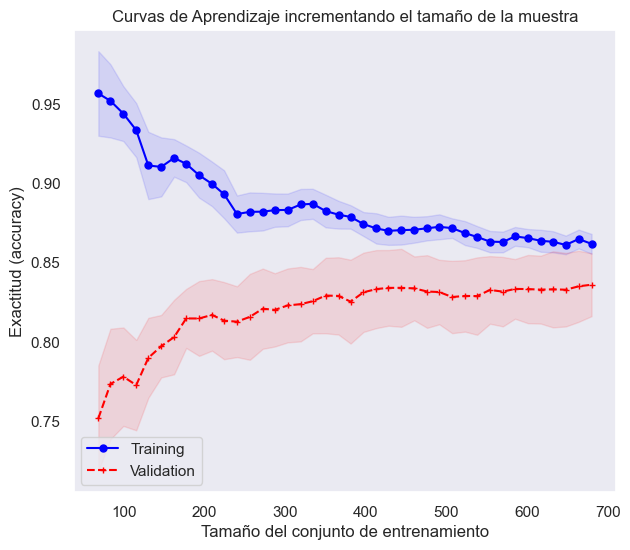

In [25]:
delta_train_sz = np.linspace(0.1,1,40)

pipelineLR = Pipeline(steps=[('ct',columnasTransformer),
            ('m',LogisticRegression(max_iter=10000, random_state=1,
                                        C = 10.0, class_weight = 'balanced_subsample',
                                        penalty = 'l2', solver = 'lbfgs'))])

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipelineLR,    
                                              X = X_train,
                                              y = Y_train,
                                              cv = kfold ,
                                              train_sizes = delta_train_sz,
                                              scoring = 'f1',
                                              random_state=2, 
                                              n_jobs=-1)

print('Curvas de aprendizaje de Logistic Regression con los mejores Hiperarametros')
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)


5c. La precisión es la relación entre las observaciones positivas predichas correctamente y el total de observaciones positivas previstas, por lo que con la métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación.

>> Esto significa que la precisión nos indica el porcentaje de veces en las que el modelo se equivocará cuando realice predicciones. 


In [26]:
#DT
# Estimador para GridSearchCV Decision Tree
EstimadorDTC = DecisionTreeClassifier()

# Parametros para GridSearchCV
# Los hiperparámetros que se deben incluir en la búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight
param_grid = { 
    'ccp_alpha': [-2,-1,0,0.5,1,2],    
    'max_depth' : [8,9,10,11,12,13,15],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [2,3,4,5,6,7,8],
    'class_weight': ['balanced','balanced_subsample']
}

# Aplicando GridSearchCV a RL
GS_DTC = GridSearchCV(EstimadorDTC, scoring='precision', param_grid=param_grid, cv= 5, n_jobs=-1)

# Aplicamos nuestra transformación al conjunto de prueba
Xx = columnasTransformer.fit_transform(X_train)
# Medimos el modelo con GridSearchCV
GS_DTC.fit(Xx,Y_train)

print("Tuned Hyperparameters :", GS_DTC.best_params_)
print("Métrica usada: ", GS_DTC.scoring)
print("Best score:",GS_DTC.best_score_)

Tuned Hyperparameters : {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 6}
Métrica usada:  precision
Best score: 0.8179647226050646


Curvas de aprendizaje de Decision Tree


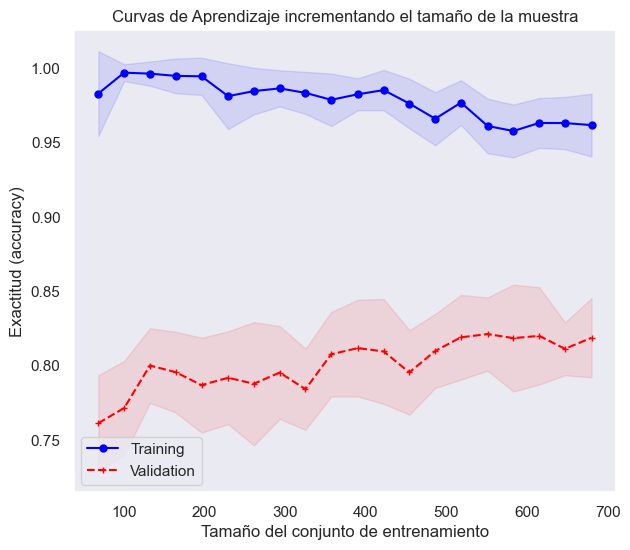

In [27]:
delta_train_sz_dtc = np.linspace(0.1,1,20)


pipelineDT = Pipeline(steps=[('ct',columnasTransformer),
                            ('m',DecisionTreeClassifier(ccp_alpha = 0, 
                                                    class_weight = 'balanced', 
                                                    criterion = 'entropy', 
                                                    max_depth=8, 
                                                    min_samples_split = 2))])

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipelineDT,    
                                              X = X_train,
                                              y = Y_train,
                                              cv = kfold,
                                              train_sizes = delta_train_sz_dtc ,
                                              scoring = 'precision',
                                              random_state=2,
                                              n_jobs=-1)

print('Curvas de aprendizaje de Decision Tree')
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

5e. ¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones.

>> Responde: ¿Cuál es la utilidad de la métrica “recall”? 

>>  La métrica de exhaustividad nos va a informar sobre la proporción de casos positivos que fueron correctamente identificadas por el algoritmo.

>> Al igual que la exactitud, tanto la precisión como la exhaustividad son fáciles de calcular y comprender, pero requieren umbrales. Además, la precisión y la exhaustividad sólo consideran la mitad de la matriz de confusión:

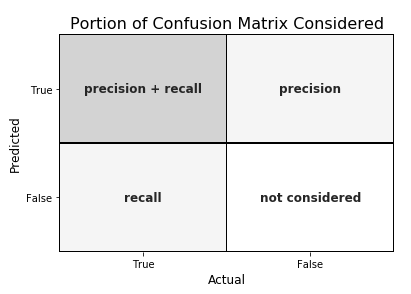

>> Esto quiere decir que la precisión, al igual que la sensibilidad nos están indicando la relevancia de los resultados. Por ejemplo, un algoritmo muy exacto, nos dará muchos más resultados relevantes que irrelevantes, mientras que un algoritmo muy sensible, será el que detecte la mayoría de resultados de interés.

La conveniencia de usar esta métrica, o cualquier otra como medida del estimador dependerá de cada caso en particular y, en concreto, del “coste” asociado a cada error de clasificación del algoritmo.

In [33]:
# Estimador para GridSearchCV
EstimadorA = RandomForestClassifier()

# Parametros para GridSearchCV
# Los hiperparámetros que se deben incluir en la búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight
param_grid = { 
    'ccp_alpha': [-2,-1,0,0.5,1,2],    
    'max_depth' : [8,9,10,11,12,13,15],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [2,3,4,5,6,7,8],
    'class_weight': ['balanced','balanced_subsample']
}

# Aplicando GridSearchCV a Rfc
CV_rfc = GridSearchCV(EstimadorA, param_grid=param_grid, cv= 5, scoring='recall', n_jobs=-1)

# Aplicamos nuestra transformación al conjunto de prueba
Xx = columnasTransformer.fit_transform(X_train)

# Medimos el modelo con GridSearchCV
CV_rfc.fit(Xx,Y_train)

# Obtenemos la lista de mejores parámetros
print("Tuned Hyperparameters :", CV_rfc.best_params_)
print("Métrica usada: ", CV_rfc.scoring)
print("Best score:",CV_rfc.best_score_)

Tuned Hyperparameters : {'ccp_alpha': 0.5, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 3}
Métrica usada:  recall
Best score: 1.0


Curvas de aprendizaje de Random Forest


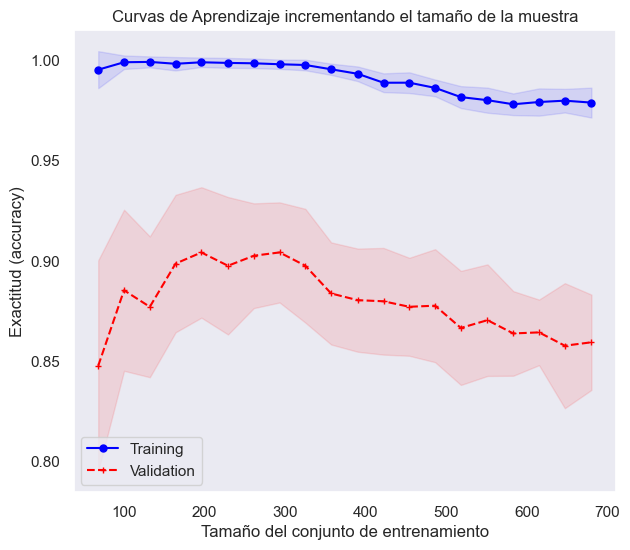

In [29]:
delta_train_sz_rf = np.linspace(0.1,1,20)


pipelineRF = Pipeline(steps=[('ct',columnasTransformer),
                            ('m',RandomForestClassifier(ccp_alpha = 0, 
                                                    class_weight = 'balanced_subsample', 
                                                    criterion = 'entropy', 
                                                    max_depth=12,
                                                    min_samples_split = 5))])

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipelineRF,    
                                              X = X_train,
                                              y = Y_train,
                                              cv = kfold,
                                              train_sizes = delta_train_sz_rf ,
                                              scoring = 'recall',
                                              random_state=2,
                                              n_jobs=-1)

print('Curvas de aprendizaje de Random Forest')
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

#**Ejercicio-6.**

Obtener el modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.

In [30]:
# Regresion logistica
pipelineLR = Pipeline(steps=[('ct',columnasTransformer),
                             ('m',LogisticRegression(max_iter=10000, random_state=1,
                                        C = 10.0, class_weight = 'balanced_subsample',
                                        penalty = 'l2', solver = 'lbfgs'))])

pipelineLR.fit(X_train, Y_train)

yhat = pipelineLR.predict(X_val)

print(classification_report(Y_val, yhat))

              precision    recall  f1-score   support

           0       0.62      0.46      0.53        52
           1       0.75      0.85      0.79        98

    accuracy                           0.71       150
   macro avg       0.68      0.65      0.66       150
weighted avg       0.70      0.71      0.70       150



Finalmente el modelo bajo su F1-Score de 0.84 hasta 0.66 con el conjunto de validacion, por lo que podemos concluir que el modelo está sobre-entrenado.

In [31]:
pipelineDT = Pipeline(steps=[('ct',columnasTransformer),
                            ('m',DecisionTreeClassifier(ccp_alpha = 0, 
                                                    class_weight = 'balanced', 
                                                    criterion = 'entropy', 
                                                    max_depth=8, 
                                                    min_samples_split = 2))])

pipelineDT.fit(X_train, Y_train)

yhat = pipelineDT.predict(X_val)

print(classification_report(Y_val, yhat))

              precision    recall  f1-score   support

           0       0.53      0.77      0.62        52
           1       0.84      0.63      0.72        98

    accuracy                           0.68       150
   macro avg       0.68      0.70      0.67       150
weighted avg       0.73      0.68      0.69       150



In [32]:
# Arbol de decision
modeloDT = DecisionTreeClassifier()
clf = modeloDT.fit(X_val, Y_val)

dot_data = tree.export_graphviz(decision_tree=clf, 
                                out_file=None,
                                max_depth=None,
                                feature_names=list(pd.DataFrame(X_train).columns.values),
                                class_names=[Nombres[0], Nombres[1], Nombres[2]],
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


InvocationException: GraphViz's executables not found

El modelo de Árbol de decisión fue el que tuvo un mejor F1-score, aunque su precisión de 0.68 vs 0.81 en entrenamiento, también nos indica que está sobre-entrenado

In [ ]:
pipelineRF = Pipeline(steps=[('ct',columnasTransformer),
                            ('m',RandomForestClassifier(ccp_alpha = 0, 
                                                    class_weight = 'balanced_subsample', 
                                                    criterion = 'entropy', 
                                                    max_depth=12,
                                                    min_samples_split = 5))])

pipelineDT.fit(X_train, Y_train)

yhat = pipelineDT.predict(X_val)

print(classification_report(Y_val, yhat))                                                

              precision    recall  f1-score   support

           0       0.49      0.77      0.60        52
           1       0.82      0.57      0.67        98

    accuracy                           0.64       150
   macro avg       0.66      0.67      0.64       150
weighted avg       0.71      0.64      0.65       150



El recall del Random Forest igual fue mejor cuando lo entrenamos, dando un resultado de 1.0

###**Fin de la Actividad de la semana 6.**